# Comparing Model Outputs for New Individuals for External Validation

This notebook allows a user to enter the risk factor data for a new individual and compare the outputs of the following models:
- 2017 Framingham Stroke Risk Profile (FSRP)
- Recalibrated and Refitted FSRP
- China Kadoorie Biobank (CKB) Cox Model
- Logistic Regression (LR)
- Linear Support Vector Machine (SVM)
- Gradient Boosted Tree (GBT)
- Multilayer Perceptron (MLP)

The model outputs include estimates of 9-year stroke risk as well as risk of stroke during years 0-3, 3-6, and 6-9 after risk factor measurements. All models have been trained separately for men and women.

First we import the required dependencies:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pickle import load
from keras.models import load_model

Using TensorFlow backend.


Next, the user is able to enter risk factor data for a new individual. If any data is unavailable (apart from sex and region), the user can enter 'Missing' as a string.

<b>Note: This should be the only cell in which the user modifies the code.

In [2]:
#ENTER RISK FACTOR DATA HERE:
#IF DATA UNAVAILABLE, ENTER 'Missing' AND VALUE WILL BE IMPUTED

sex = 'Female' #Set as 'Male' or 'Female'. 'Missing' is not an option for this feature.
age = 43 #Enter age in years
region = 'Haikou' #Set as 'Qingdao','Harbin','Haikou','Suzhou','Liuzhou','Sichuan','Gansu','Henan','Zhejiang', or 'Hunan'. 'Missing' is not an option for this feature.
sbp_mean = 120 #Systolic blood pressure in mmHg (mean of two measurements)
used_blood_pressure_drugs = 0 #Do you use blood pressure drugs? (0: no, 1: yes)
has_diabetes = 0 #Do you have diabetes? (0: no, 1: yes)
household_size = 4 #How many people live together in your household?
has_health_cover = 1 #Do you have health care coverage? (0: no, 1: yes)
years_since_quitting_smoking = 0 #How many years since quitting smoking? (0 if you currently smoke or never smoked; decimal values allowed)
has_copd = 0 #Has a doctor EVER told you that you had COPD? (0: no, 1: yes)
hypertension_diag = 0 #Has a doctor EVER told you that you had hypertension? (0: no, 1: yes)
rheum_heart_dis_diag = 0 #Has a doctor EVER told you that you had rheumatic heart disease? (0: no, 1: yes)
tb_diag = 0 #Has a doctor EVER told you that you had TB? (0: no, 1: yes)
cirrhosis_hep_diag = 0 #Has a doctor EVER told you that you had cirrhosis/chronic hepatitis? (0: no, 1: yes)
peptic_ulcer_diag = 0 #Has a doctor EVER told you that you had a peptic ulcer? (0: no, 1: yes)
gall_diag = 0 #Has a doctor EVER told you that you had a gallstone/gallbladder dis.? (0: no, 1: yes)
asthma_diag = 0 #Has a doctor EVER told you that you had asthma? (0: no, 1: yes)
kidney_dis_diag = 0 #Has a doctor EVER told you that you had kidney disease? (0: no, 1: yes)
fracture_diag = 0 #Has a doctor EVER told you that you had a fracture? (0: no, 1: yes)
rheum_arthritis_diag = 0 #Has a doctor EVER told you that you had rheumatoid arthritis? (0: no, 1: yes)
neurasthenia_diag = 0 #Has a doctor EVER told you that you had neurasthenia? (0: no, 1: yes)
head_injury_diag = 0 #Has a doctor EVER told you that you had a head injury? (0: no, 1: yes)
cancer_diag = 0 #Has a doctor EVER told you that you had cancer? (0: no, 1: yes)
blood_transfusions = 0 #How many blood transfusions have you received? (if none, put 0)
children = 0 #How many children do you have?
siblings = 0 #How many siblings do you have?
mother_still_alive = 1 #Is your mother still alive? (0: no, 1: yes)
father_still_alive = 1 #Is your father still alive? (0: no, 1: yes)
mother_stroke = 0 #Did your mother ever have a stroke? (0: no, 1: yes)
mother_heart_attack = 0 #Did your mother ever have a heart attack? (0: no, 1: yes)
mother_diabetes = 0 #Did your mother ever have diabetes? (0: no, 1: yes)
mother_cancer = 0 #Did your mother ever have cancer? (0: no, 1: yes)
father_stroke = 0 #Did your father ever have a stroke? (0: no, 1: yes)
father_diabetes = 0 #Did your father ever have diabetes? (0: no, 1: yes)
father_heart_attack = 0 #Did your father ever have a heart attack? (0: no, 1: yes)
father_cancer = 0 #Did your father ever have cancer? (0: no, 1: yes)
siblings_stroke = 0 #Did your siblings (incl. half siblings) ever have a stroke? (0: if no, else record the number with disease)
siblings_diabetes = 0 #Did your siblings (incl. half siblings) ever have diabetes? (0: if no, else record the number with disease)
siblings_heart_attack = 0 #Did your siblings (incl. half siblings) ever have a heart attack? (0: if no, else record the number with disease)
siblings_cancer = 0 #Did your siblings (incl. half siblings) ever have cancer? (0: if no, else record the number with disease)
children_stroke = 0 #Did your children ever have a stroke? (0: if no, else record the number with disease)
children_heart_attack = 0 #Did your children ever have a heart attack? (0: if no, else record the number with disease)
children_diabetes = 0 #Did your children ever have diabetes? (0: if no, else record the number with disease)
children_cancer = 0 #Did your children ever have cancer? (0: if no, else record the number with disease)
met = 21.3 #Total daily physical activity (Metabolic Equivalent of Task)
met_hours = 6.2 #Total daily hours spent on physical activity
standing_height_cm = 170 #Standing height in cm (without shoes)
sitting_height_cm = 89.2 #Sitting height in cm
waist_cm = 75 #Waist measurement in cm
waist_hip_ratio_percent = 90 #Waist to hip ratio (percent * 100)
weight_kg = 60 #Weight in kg (without shoes, but in light clothing)
bmi_calc = 23.1 #BMI calculated from measured height and weight (in kg/m^2)
fat_percent = 10.2 #Body fat percentage (percent * 100)
dbp_mean = 83 #Diastolic BP in mmHg (mean of two measurements)
heart_rate_mean_10s = 7.3 #Heart rate (bpm/10)
smoking_category_1 = 1 #Does the following characterize your smoking behavior? -- Never smoker (0: no, 1: yes)
smoking_category_2 = 0 #Does the following characterize your smoking behavior? -- Occasional smoker (0: no, 1: yes)
smoking_category_3 = 0 #Does the following characterize your smoking behavior? -- Ex regular smoker (0: no, 1: yes)
smoking_category_4 = 0 #Does the following characterize your smoking behavior? -- Regular smoker (0: no, 1: yes)
chd_diag = 0 #Has a doctor EVER told you that you had coronary heart disease? (0: no, 1: yes)
emph_bronc_diag = 0 #Has a doctor EVER told you that you had emphysema/bronchitis? (0: no, 1: yes)
psych_disorder_diag = 0 #Has a doctor EVER told you that you have a psychiatric disorder? (0: no, 1: yes)
highest_education_0 = 0 #What is the highest level of school education you ever received? -- No formal school (0: no, 1: yes)
highest_education_1 = 0 #What is the highest level of school education you ever received? -- Primary School (0: no, 1: yes)
highest_education_2 = 0 #What is the highest level of school education you ever received? -- Middle School (0: no, 1: yes)
highest_education_3 = 0 #What is the highest level of school education you ever received? -- High School (0: no, 1: yes)
highest_education_4 = 0 #What is the highest level of school education you ever received? -- Technical school / college (0: no, 1: yes)
highest_education_5 = 1 #What is the highest level of school education you ever received? -- University (0: no, 1: yes)
occupation_0 = 0 #What is your current occupation? -- Agriculture & related workers (0: no, 1: yes)
occupation_1 = 0 #What is your current occupation? -- Factory worker (0: no, 1: yes)
occupation_2 = 0 #What is your current occupation? -- Administrator / manager (0: no, 1: yes)
occupation_3 = 1 #What is your current occupation? -- Professional / technical (0: no, 1: yes)
occupation_4 = 0 #What is your current occupation? -- Sales & service workers (0: no, 1: yes)
occupation_5 = 0 #What is your current occupation? -- Retired (0: no, 1: yes)
occupation_6 = 0 #What is your current occupation? -- House wife / husband (0: no, 1: yes)
occupation_7 = 0 #What is your current occupation? -- Self-employed (0: no, 1: yes)
occupation_8 = 0 #What is your current occupation? -- Unemployed (0: no, 1: yes)
occupation_9 = 0 #What is your current occupation? -- Other or not stated (0: no, 1: yes)
household_income_0 = 0 #What is the total income last year in your household? -- <2,500 yuan (0: no, 1: yes)
household_income_1 = 0 #What is the total income last year in your household? -- 2,500-4,999 yuan (0: no, 1: yes)
household_income_2 = 0 #What is the total income last year in your household? -- 5,000-9,999 yuan (0: no, 1: yes)
household_income_3 = 0 #What is the total income last year in your household? -- 10,000-19,999 yuan (0: no, 1: yes)
household_income_4 = 0 #What is the total income last year in your household? -- 20,000-34,999 yuan (0: no, 1: yes)
household_income_5 = 1 #What is the total income last year in your household? -- >=35,000 yuan (0: no, 1: yes)
alcohol_category_1 = 0 #Does the following characterize your alcohol intake? -- Never regular (0: no; 1: yes)
alcohol_category_2 = 0 #Does the following characterize your alcohol intake? -- Ex-regular (0: no; 1: yes)
alcohol_category_3 = 0 #Does the following characterize your alcohol intake? -- Occasional (0: no; 1: yes)
alcohol_category_4 = 0 #Does the following characterize your alcohol intake? -- Monthly (0: no; 1: yes)
alcohol_category_5 = 0 #Does the following characterize your alcohol intake? -- Reduced intake (0: no; 1: yes)
alcohol_category_6 = 1 #Does the following characterize your alcohol intake? -- Weekly (0: no; 1: yes)
smoking_now_0 = 1 #Does the following characterize your smoking behavior? -- Do not smoke now (0: no; 1: yes)
smoking_now_1 = 0 #Does the following characterize your smoking behavior? -- Only occasionally (0: no; 1: yes)
smoking_now_2 = 0 #Does the following characterize your smoking behavior? -- Yes, on most days (0: no; 1: yes)
smoking_now_3 = 0 #Does the following characterize your smoking behavior? -- Yes, daily or almost every day (0: no; 1: yes)
self_rated_health_0 = 1 #How would you rate your current general health status? -- Excellent (0: no, 1: yes)
self_rated_health_1 = 0 #How would you rate your current general health status? -- Good  (0: no, 1: yes)
self_rated_health_2 = 0 #How would you rate your current general health status? -- Fair (0: no, 1: yes)
self_rated_health_3 = 0 #How would you rate your current general health status? -- Poor (0: no, 1: yes)
comparative_health_0 = 1 #How would rate your current general health status compared to someone of your own age? -- Better (0: no, 1: yes)
comparative_health_1 = 0 #How would rate your current general health status compared to someone of your own age? -- About the same (0: no, 1: yes)
comparative_health_2 = 0 #How would rate your current general health status compared to someone of your own age? -- Worse (0: no, 1: yes)
comparative_health_3 = 0 #How would rate your current general health status compared to someone of your own age? -- Don't know (0: no, 1: yes)
diet_freq_rice_0 = 0 #During the past 12 months, about how often did you eat rice? -- Daily (0: no, 1: yes)
diet_freq_rice_1 = 0 #During the past 12 months, about how often did you eat rice? -- 4-6 days per week (0: no, 1: yes)
diet_freq_rice_2 = 1 #During the past 12 months, about how often did you eat rice? -- 1-3 days per week (0: no, 1: yes)
diet_freq_rice_3 = 0 #During the past 12 months, about how often did you eat rice?  -- Monthly (0: no, 1: yes)
diet_freq_rice_4 = 0 #During the past 12 months, about how often did you eat rice? -- Never/rarely (0: no, 1:yes)
diet_freq_wheat_0 = 0 #During the past 12 months, about how often did you eat wheat? -- Daily (0: no, 1: yes)
diet_freq_wheat_1 = 1 #During the past 12 months, about how often did you eat wheat? -- 4-6 days per week (0: no, 1: yes)
diet_freq_wheat_2 = 0 #During the past 12 months, about how often did you eat wheat? -- 1-3 days per week (0: no, 1: yes)
diet_freq_wheat_3 = 0 #During the past 12 months, about how often did you eat wheat?  -- Monthly (0: no, 1: yes)
diet_freq_wheat_4 = 0 #During the past 12 months, about how often did you eat wheat? -- Never/rarely (0: no, 1:yes)
diet_freq_other_staple_0 = 0 #During the past 12 months, about how often did you eat staple foods other than rice and wheat (corn, millet etc.)? -- Daily (0: no, 1: yes)
diet_freq_other_staple_1 = 0 #During the past 12 months, about how often did you eat staple foods other than rice and wheat (corn, millet etc.)? -- 4-6 days per week (0: no, 1: yes)
diet_freq_other_staple_2 = 0 #During the past 12 months, about how often did you eat staple foods other than rice and wheat (corn, millet etc.)? -- 1-3 days per week (0: no, 1: yes)
diet_freq_other_staple_3 = 1 #During the past 12 months, about how often did you eat staple foods other than rice and wheat (corn, millet etc.)?  -- Monthly (0: no, 1: yes)
diet_freq_other_staple_4 = 0 #During the past 12 months, about how often did you eat staple foods other than rice and wheat (corn, millet etc.)? -- Never/rarely (0: no, 1:yes)
bowel_movement_freq_0 = 0 #About how often do you have bowel movements each week? -- More than once on most days (0: no, 1:yes)
bowel_movement_freq_1 = 1 #About how often do you have bowel movements each week? -- About daily (0: no, 1:yes)
bowel_movement_freq_2 = 0 #About how often do you have bowel movements each week? -- Once every 2-3 days (0: no, 1:yes)
bowel_movement_freq_3 = 0 #About how often do you have bowel movements each week? -- Less than 3 times a week (0: no, 1:yes)
gum_bleed_freq_0 = 1 #How often do your gums bleed when you brush your teeth? -- Occasionally, rarely or never (0: no, 1:yes)
gum_bleed_freq_1 = 0 #How often do your gums bleed when you brush your teeth? -- Sometimes (0: no, 1:yes)
gum_bleed_freq_2 = 0 #How often do your gums bleed when you brush your teeth? -- Always (0: no, 1:yes)
gum_bleed_freq_3 = 0 #How often do your gums bleed when you brush your teeth? -- Brush teeth rarely or never (0: no, 1:yes)
missing_mother_history = 0 #Are you unable to answer if your mother had any of the following: stroke, heart attack, diabetes, cancer? (0: no, 1: yes)
missing_father_history = 0 #Are you unable to answer if your father had any of the following: stroke, heart attack, diabetes, cancer? (0: no, 1: yes)
missing_siblings_history = 0 #Are you unable to answer if your siblings had any of the following: stroke, heart attack, diabetes, cancer? (0: no, 1: yes)
missing_children_history = 0 #Are you unable to answer if your children had any of the following: stroke, heart attack, diabetes, cancer? (0: no, 1: yes)


In the following cell, backend processing is done to:
- Calculate derived risk factors from the user input
- Prepare the input vector to the models
- Impute missing data with mean values from the CKB training set

In [3]:
#CALCULATE DERIVED RISK FACTORS:

#region_is_urban
if region in ['Qingdao','Harbin','Haikou','Suzhou','Liuzhou']:
    region_is_urban = 1
else:
    region_is_urban = 0

#age_at_study_date
if (age == 'Missing'):
    age_at_study_date = 'Missing'
else:
    age_at_study_date = age/10
    

#over_65
if (age == 'Missing'):
    over_65 = 'Missing'
elif age >= 65:
    over_65 = 1
else:
    over_65 = 0

#diab_under_65
if (over_65 == 'Missing')|(has_diabetes == 'Missing'):
    diab_under_65 = 'Missing'
elif (over_65 == 0) & (has_diabetes == 1):
    diab_under_65 = 1
else:
    diab_under_65 = 0
    
#diab_over_65
if (over_65 == 'Missing')|(has_diabetes == 'Missing'):
    diab_over_65 = 'Missing'
elif (over_65 == 1) & (has_diabetes == 1):
    diab_over_65 = 1
else:
    diab_over_65 = 0

#sbp_noHRX
if (sbp_mean == 'Missing')|(used_blood_pressure_drugs == 'Missing'):
    sbp_noHRX = 'Missing'
else:
    sbp_noHRX = ((sbp_mean-120)*(1-used_blood_pressure_drugs))/10

#sbp_HRX
if (sbp_mean == 'Missing')|(used_blood_pressure_drugs == 'Missing'):
    sbp_HRX = 'Missing'
else:
    sbp_HRX = ((sbp_mean-120)*(used_blood_pressure_drugs))/10
    
#sbp_mean
if (sbp_mean == 'Missing'):
    sbp_mean = 'Missing'
else:
    sbp_mean = sbp_mean/10
    
##########################################################################################################
#CREATE INPUT VECTOR

column_names = ['region','region_is_urban','age_at_study_date','sbp_mean','used_blood_pressure_drugs','has_diabetes',
                'household_size','has_health_cover','years_since_quitting_smoking','has_copd','hypertension_diag',
                'rheum_heart_dis_diag','tb_diag','cirrhosis_hep_diag','peptic_ulcer_diag','gall_diag','asthma_diag',
                'kidney_dis_diag','fracture_diag','rheum_arthritis_diag','neurasthenia_diag','head_injury_diag',
                'cancer_diag','blood_transfusions','children','siblings','mother_still_alive','father_still_alive',
                'mother_stroke','mother_heart_attack','mother_diabetes','mother_cancer','father_stroke','father_diabetes',
                'father_heart_attack','father_cancer','siblings_stroke','siblings_diabetes','siblings_heart_attack',
                'siblings_cancer','children_stroke','children_heart_attack','children_diabetes','children_cancer','met',
                'met_hours','standing_height_cm','sitting_height_cm','waist_cm','waist_hip_ratio_percent','weight_kg',
                'bmi_calc','fat_percent','dbp_mean','heart_rate_mean_10s','over_65','smoking_category_1',
                'smoking_category_2','smoking_category_3','smoking_category_4','diab_under_65','diab_over_65','sbp_noHRX',
                'sbp_HRX','chd_diag','emph_bronc_diag','psych_disorder_diag','highest_education_0','highest_education_1',
                'highest_education_2','highest_education_3','highest_education_4','highest_education_5','occupation_0',
                'occupation_1','occupation_2','occupation_3','occupation_4','occupation_5','occupation_6','occupation_7',
                'occupation_8','occupation_9','household_income_0','household_income_1','household_income_2',
                'household_income_3','household_income_4','household_income_5','alcohol_category_1','alcohol_category_2',
                'alcohol_category_3','alcohol_category_4','alcohol_category_5','alcohol_category_6','smoking_now_0',
                'smoking_now_1','smoking_now_2','smoking_now_3','self_rated_health_0','self_rated_health_1',
                'self_rated_health_2','self_rated_health_3','comparative_health_0','comparative_health_1',
                'comparative_health_2','comparative_health_3','diet_freq_rice_0','diet_freq_rice_1','diet_freq_rice_2',
                'diet_freq_rice_3','diet_freq_rice_4','diet_freq_wheat_0','diet_freq_wheat_1','diet_freq_wheat_2',
                'diet_freq_wheat_3','diet_freq_wheat_4','diet_freq_other_staple_0','diet_freq_other_staple_1',
                'diet_freq_other_staple_2','diet_freq_other_staple_3','diet_freq_other_staple_4','bowel_movement_freq_0',
                'bowel_movement_freq_1','bowel_movement_freq_2','bowel_movement_freq_3','gum_bleed_freq_0',
                'gum_bleed_freq_1','gum_bleed_freq_2','gum_bleed_freq_3','missing_mother_history','missing_father_history',
                'missing_siblings_history','missing_children_history']

risk_factor_df = pd.DataFrame(columns = column_names)
risk_factor_df = risk_factor_df.append({
    'region':region,'region_is_urban':region_is_urban,'age_at_study_date':age_at_study_date,'sbp_mean':sbp_mean,
    'used_blood_pressure_drugs':used_blood_pressure_drugs,'has_diabetes':has_diabetes,'household_size':household_size,
    'has_health_cover':has_health_cover,'years_since_quitting_smoking':years_since_quitting_smoking,'has_copd':has_copd,
    'hypertension_diag':hypertension_diag,'rheum_heart_dis_diag':rheum_heart_dis_diag,'tb_diag':tb_diag,
    'cirrhosis_hep_diag':cirrhosis_hep_diag,'peptic_ulcer_diag':peptic_ulcer_diag,'gall_diag':gall_diag,
    'asthma_diag':asthma_diag,'kidney_dis_diag':kidney_dis_diag,'fracture_diag':fracture_diag,
    'rheum_arthritis_diag':rheum_arthritis_diag,'neurasthenia_diag':neurasthenia_diag,'head_injury_diag':head_injury_diag,
    'cancer_diag':cancer_diag,'blood_transfusions':blood_transfusions,'children':children,'siblings':siblings,
    'mother_still_alive':mother_still_alive,'father_still_alive':father_still_alive,'mother_stroke':mother_stroke,
    'mother_heart_attack':mother_heart_attack,'mother_diabetes':mother_diabetes,'mother_cancer':mother_cancer,
    'father_stroke':father_stroke,'father_diabetes':father_diabetes,'father_heart_attack':father_heart_attack,
    'father_cancer':father_cancer,'siblings_stroke':siblings_stroke,'siblings_diabetes':siblings_diabetes,
    'siblings_heart_attack':siblings_heart_attack,'siblings_cancer':siblings_cancer,'children_stroke':children_stroke,
    'children_heart_attack':children_heart_attack,'children_diabetes':children_diabetes,'children_cancer':children_cancer,
    'met':met,'met_hours':met_hours,'standing_height_cm':standing_height_cm,'sitting_height_cm':sitting_height_cm,
    'waist_cm':waist_cm,'waist_hip_ratio_percent':waist_hip_ratio_percent,'weight_kg':weight_kg,'bmi_calc':bmi_calc,
    'fat_percent':fat_percent,'dbp_mean':dbp_mean,'heart_rate_mean_10s':heart_rate_mean_10s,'over_65':over_65,
    'smoking_category_1':smoking_category_1,'smoking_category_2':smoking_category_2,'smoking_category_3':smoking_category_3,
    'smoking_category_4':smoking_category_4,'diab_under_65':diab_under_65,'diab_over_65':diab_over_65,'sbp_noHRX':sbp_noHRX,
    'sbp_HRX':sbp_HRX,'chd_diag':chd_diag,'emph_bronc_diag':emph_bronc_diag,'psych_disorder_diag':psych_disorder_diag,
    'highest_education_0':highest_education_0,'highest_education_1':highest_education_1,'highest_education_2':highest_education_2,
    'highest_education_3':highest_education_3,'highest_education_4':highest_education_4,'highest_education_5':highest_education_5,
    'occupation_0':occupation_0,'occupation_1':occupation_1,'occupation_2':occupation_2,'occupation_3':occupation_3,
    'occupation_4':occupation_4,'occupation_5':occupation_5,'occupation_6':occupation_6,'occupation_7':occupation_7,
    'occupation_8':occupation_8,'occupation_9':occupation_9,'household_income_0':household_income_0,
    'household_income_1':household_income_1,'household_income_2':household_income_2,'household_income_3':household_income_3,
    'household_income_4':household_income_4,'household_income_5':household_income_5,'alcohol_category_1':alcohol_category_1,
    'alcohol_category_2':alcohol_category_2,'alcohol_category_3':alcohol_category_3,'alcohol_category_4':alcohol_category_4,
    'alcohol_category_5':alcohol_category_5,'alcohol_category_6':alcohol_category_6,'smoking_now_0':smoking_now_0,
    'smoking_now_1':smoking_now_1,'smoking_now_2':smoking_now_2,'smoking_now_3':smoking_now_3,'self_rated_health_0':self_rated_health_0,
    'self_rated_health_1':self_rated_health_1,'self_rated_health_2':self_rated_health_2,'self_rated_health_3':self_rated_health_3,
    'comparative_health_0':comparative_health_0,'comparative_health_1':comparative_health_1,'comparative_health_2':comparative_health_2,
    'comparative_health_3':comparative_health_3,'diet_freq_rice_0':diet_freq_rice_0,'diet_freq_rice_1':diet_freq_rice_1,
    'diet_freq_rice_2':diet_freq_rice_2,'diet_freq_rice_3':diet_freq_rice_3,'diet_freq_rice_4':diet_freq_rice_4,
    'diet_freq_wheat_0':diet_freq_wheat_0,'diet_freq_wheat_1':diet_freq_wheat_1,'diet_freq_wheat_2':diet_freq_wheat_2,
    'diet_freq_wheat_3':diet_freq_wheat_3,'diet_freq_wheat_4':diet_freq_wheat_4,'diet_freq_other_staple_0':diet_freq_other_staple_0,
    'diet_freq_other_staple_1':diet_freq_other_staple_1,'diet_freq_other_staple_2':diet_freq_other_staple_2,
    'diet_freq_other_staple_3':diet_freq_other_staple_3,'diet_freq_other_staple_4':diet_freq_other_staple_4,
    'bowel_movement_freq_0':bowel_movement_freq_0,'bowel_movement_freq_1':bowel_movement_freq_1,
    'bowel_movement_freq_2':bowel_movement_freq_2,'bowel_movement_freq_3':bowel_movement_freq_3,'gum_bleed_freq_0':gum_bleed_freq_0,
    'gum_bleed_freq_1':gum_bleed_freq_1,'gum_bleed_freq_2':gum_bleed_freq_2,'gum_bleed_freq_3':gum_bleed_freq_3,
    'missing_mother_history':missing_mother_history,'missing_father_history':missing_father_history,
    'missing_siblings_history':missing_siblings_history,'missing_children_history':missing_children_history
},ignore_index = True)

#If any values are 'Missing', replace with CKB mean value
male_mean_value_df = pd.DataFrame(columns = column_names)
male_mean_value_df.loc[len(male_mean_value_df)]=['NA',0.430950498,5.263505828,13.25402927,0.099336382,0.05290032,
                                                 3.80744765,0.8484911,1.394061345,0.087129938,0.10272324,0.000957031,
                                                 0.019891345,0.017249481,0.053169664,0.038447432,0.005650495,0.012424211,
                                                 0.088350583,0.014189274,0.007203521,0.016550333,0.00450435,0.054098041,
                                                 2.012664902,3.339219251,0.567616821,0.711515318,0.080231331,0.013006609,
                                                 0.031842383,0.060271033,0.09662493,0.016860996,0.015655409,0.094529505,
                                                 0.030217181,0.030068073,0.005339191,0.040362216,0.000458458,0.000252152,
                                                 0.001318067,0.00189687,22.29973685,6.355241264,165.2396005,88.35389059,
                                                 81.93837121,90.29892606,64.11819114,23.40745686,21.94969035,79.09611858,
                                                 7.769930887,0.163474653,0.143061812,0.113027083,0.12850004,0.615411065,
                                                 0.038814198,0.014086121,0.966956928,0.287072345,0.024899999,0.030882875,
                                                 0.002699171,0.088585543,0.333654254,0.325018052,0.175016333,0.044613692,
                                                 0.033112127,0.438778668,0.194237183,0.034504693,0.037524785,0.049519192,
                                                 0.139193572,0.02617222,0.035799837,0.027324095,0.016945753,0.02885993,
                                                 0.063169778,0.168191039,0.282152231,0.25415191,0.203475111,0.201824663,
                                                 0.034923036,0.316370388,0.063525083,0.047714014,0.335642815,0.322496533,
                                                 0.094877878,0.016951484,0.565674105,0.203085422,0.296714002,0.417844331,
                                                 0.082356245,0.207291774,0.635371179,0.130224988,0.027112059,0.686391821,
                                                 0.019719424,0.159319878,0.097519742,0.037049135,0.415832846,0.082436475,
                                                 0.240197595,0.181692627,0.079840457,0.135204988,0.007341058,0.114774954,
                                                 0.427546448,0.315132552,0.126608901,0.790100746,0.064229963,0.01906039,
                                                 0.654981719,0.191790164,0.037415902,0.115812216,0.001157606,0.001770794,0.000727802,0]

female_mean_value_df = pd.DataFrame(columns = column_names)
female_mean_value_df.loc[len(female_mean_value_df)]=['NA',0.444027175,5.132173889,12.96632725,0.114239102,0.059617916,
                                                     3.79464152,0.802577966,0.102426382,0.06137544,0.112134801,0.002313155,
                                                     0.011163828,0.008405381,0.029176485,0.075124327,0.005260752,
                                                     0.015912297,0.055732446,0.024762971,0.013433636,0.00703798,0.005252871,
                                                     0.06631306,2.127101345,3.536107571,0.533984064,0.686364604,0.082093177,
                                                     0.013713126,0.034616463,0.057387438,0.093056702,0.018068457,0.015369844,
                                                     0.090314627,0.031378846,0.035592679,0.005878848,0.043250964,0.000634443,
                                                     0.000267963,0.001501383,0.002486543,20.54483875,6.430382321,154.1575952,
                                                     83.16809699,78.98875027,86.62182089,56.67632889,23.80129608,32.06847923,
                                                     76.70663328,7.965437056,0.125615725,0.94980021,0.018485534,0.00846055,
                                                     0.023253706,0.043276089,0.016341827,0.614425494,0.351901752,0.030496599,
                                                     0.022272487,0.004515971,0.25234665,0.314222551,0.254159344,0.134840759,
                                                     0.029105554,0.015325142,0.408399864,0.107839506,0.013319357,0.026516555,
                                                     0.050227375,0.174566333,0.15565521,0.021957236,0.02593334,0.015585224,
                                                     0.030390202,0.070639881,0.195932473,0.295173506,0.242881237,0.164982701,
                                                     0.635400329,0.004334702,0.320980746,0.014028672,0.004393812,0.020861739,
                                                     0.96801384,0.010328413,0.001083676,0.020574072,0.161641039,0.27537574,
                                                     0.45320098,0.10978224,0.167768732,0.626293514,0.172639361,0.033298393,
                                                     0.703924088,0.020507081,0.15318837,0.093156688,0.029223773,0.383696003,
                                                     0.066104206,0.226677333,0.209815342,0.113707116,0.125757588,0.009721555,
                                                     0.135049613,0.45881639,0.270654855,0.075427756,0.747641528,0.116071499,
                                                     0.060859217,0.623428671,0.233857176,0.064181175,0.078532979,0.001990022,
                                                     0.00265205,0.001241301,0]

for column in risk_factor_df:
    if (sex == 'Male'):
        risk_factor_df.loc[risk_factor_df[column] == 'Missing', column] = male_mean_value_df[column][0]
    else:
        risk_factor_df.loc[risk_factor_df[column] == 'Missing', column] = female_mean_value_df[column][0]

In the following cell, we calculate stroke risk estimates using the FSRP, as presented in Dufouil et al., 2017 with the exception of atrial fibrillation, which was not recorded in CKB.

(Link to paper: https://doi.org/10.1161/CIRCULATIONAHA.115.021275)

In [4]:
#FSRP (without atrial fibrillation) Output

FSRP_risk_factor_df = risk_factor_df.copy()
FSRP_risk_factor_df['smoking_now'] = np.where(risk_factor_df['smoking_now_0']==1, 0, 1)

if (sex == 'Male'):
    #Vector format: [Age/10,smoking,CVD,65+,Diab_65-,Diab_65+,BP_drugs,sbp_noHRX,sbp_HRX]
    male_coeffs = np.array([0.49716,0.47254,0.45341,0.45426,1.35304,0.34385,0.82598,0.27323,0.09793])
    male_means = np.array([6.6753588,0.124400,0.1798341,0.5229158,0.058490,0.092100,0.4212134,0.6656045,0.8152772])
    S_3_male = 0.98919
    S_6_male = 0.97661
    S_9_male = 0.95509
    
    M_male = male_coeffs.dot(male_means)
    x_male = FSRP_risk_factor_df[['age_at_study_date','smoking_now','chd_diag','over_65','diab_under_65','diab_over_65','used_blood_pressure_drugs','sbp_noHRX','sbp_HRX']].values
    L_male = x_male.dot(male_coeffs)
    A_male = L_male-M_male
    B_male = np.exp(A_male.astype(float))
    
    p_male_3 = 1-(S_3_male**B_male)
    p_male_6 = 1-(S_6_male**B_male)
    p_male_9 = 1-(S_9_male**B_male)

    
    FSRP_9yr_risk = p_male_9
    FSRP_0_3yr_risk = p_male_3
    FSRP_3_6yr_risk = p_male_6-p_male_3 
    FSRP_6_9yr_risk = p_male_9-p_male_6
    
else:
    #Vector format: [Age/10,smoking,CVD,65+,Diab_65-,Diab_65+,BP_drugs,sbp_noHRX,sbp_HRX]
    female_coeffs = np.array([0.87938,0.51127,-0.03035,0.39796,1.07111,0.06565,0.13085,0.11303,0.17234])
    female_means = np.array([6.7870368,0.1384394,0.1006832,0.568141,0.0320029,0.0564545,0.396980,0.5706221,0.9388709])
    S_3_female = 0.99424
    S_6_female = 0.98327
    S_9_female = 0.96581

    #Female Model
    M_female = female_coeffs.dot(female_means)
    x_female = FSRP_risk_factor_df[['age_at_study_date','smoking_now','chd_diag','over_65','diab_under_65','diab_over_65','used_blood_pressure_drugs','sbp_noHRX','sbp_HRX']].values
    L_female = x_female.dot(female_coeffs)
    A_female = L_female-M_female
    B_female = np.exp(A_female.astype(float))
    p_female = 1-(S_9_female**B_female)
    
    p_female_3 = 1-(S_3_female**B_female)
    p_female_6 = 1-(S_6_female**B_female)
    p_female_9 = 1-(S_9_female**B_female)

    FSRP_9yr_risk = p_female
    FSRP_0_3yr_risk = p_female_3
    FSRP_3_6yr_risk = p_female_6-p_female_3 
    FSRP_6_9yr_risk = p_female_9-p_female_6

In the following cell, we calculate stroke risk estimates using a recalibrated and refitted FSRP trained using CKB data. The risk factor coefficients and baseline survival functions for each region are included below.

In [5]:
#Recalibrated and Refitted FSRP (without atrial fibrillation) Output

FSRP_risk_factor_df = risk_factor_df.copy()
FSRP_risk_factor_df['smoking_now'] = np.where(risk_factor_df['smoking_now_0']==1, 0, 1)

region = FSRP_risk_factor_df['region'][0]

if (sex == 'Male'):
    #Vector format: [Age/10,smoking,CVD,65+,Diab_65-,Diab_65+,BP_drugs,sbp_noHRX,sbp_HRX]
    male_coeffs = np.array([0.69199696,0.16897723,0.16314926,-0.13967709,0.50723661,0.24428757,0.70359651,0.19377743,0.0894212])
    
    male_means = np.array([5.26350583, 0.67750347, 0.0249    , 0.16347465, 0.0388142 ,
        0.01408612, 0.09933638, 0.96695693, 0.28707234])
    
    Survival_retrained_male = {'Qingdao': np.array([[1.        , 0.9975566 , 0.99485713, 0.99181601, 0.98876377,
         0.98474063, 0.97987223, 0.97453526, 0.96801066, 0.96078314]]),
 'Harbin': np.array([[1.        , 0.99261516, 0.98163398, 0.96882976, 0.95334651,
         0.93584728, 0.91634063, 0.89663451, 0.87218306, 0.84916639]]),
 'Haikou': np.array([[1.        , 0.99456542, 0.9885399 , 0.98123277, 0.97217516,
         0.96101014, 0.94541524, 0.9316325 , 0.91587629, 0.90047497]]),
 'Suzhou': np.array([[1.        , 0.99890109, 0.99745648, 0.99545061, 0.99262683,
         0.98880074, 0.98445847, 0.98007265, 0.97414271, 0.96899247]]),
 'Liuzhou': np.array([[1.        , 0.99603467, 0.98957545, 0.98229644, 0.97398881,
         0.966129  , 0.95894933, 0.95064513, 0.94155596, 0.93235449]]),
 'Sichuan': np.array([[1.        , 0.99770262, 0.99546927, 0.99184998, 0.98796332,
         0.98387353, 0.97896717, 0.97247347, 0.96595605, 0.95617512]]),
 'Gansu': np.array([[1.        , 0.99691333, 0.99215479, 0.98719154, 0.98158817,
         0.9739304 , 0.96566313, 0.95598842, 0.94638019, 0.93507836]]),
 'Henan': np.array([[1.        , 0.99426241, 0.98800017, 0.97961605, 0.96963398,
         0.95826425, 0.94623292, 0.93148483, 0.91489355, 0.89904672]]),
 'Zhejiang': np.array([[1.        , 0.99769469, 0.9940403 , 0.9898103 , 0.9866152 ,
         0.98269232, 0.97958699, 0.97534397, 0.97145794, 0.96667647]]),
 'Hunan': np.array([[1.        , 0.99666281, 0.99114382, 0.98358032, 0.97585018,
         0.96801455, 0.95991193, 0.95107662, 0.9404145 , 0.92870802]])}
    
    S_3_male = Survival_retrained_male[region][0,3]
    S_6_male = Survival_retrained_male[region][0,6]
    S_9_male = Survival_retrained_male[region][0,9]
    
    M_male = male_coeffs.dot(male_means)
    x_male = FSRP_risk_factor_df[['age_at_study_date','smoking_now','chd_diag','over_65','diab_under_65','diab_over_65','used_blood_pressure_drugs','sbp_noHRX','sbp_HRX']].values
    L_male = x_male.dot(male_coeffs)
    A_male = L_male-M_male
    B_male = np.exp(A_male.astype(float))
    
    p_male_3 = 1-(S_3_male**B_male)
    p_male_6 = 1-(S_6_male**B_male)
    p_male_9 = 1-(S_9_male**B_male)

    
    Recalibrated_Refitted_FSRP_9yr_risk = p_male_9
    Recalibrated_Refitted_FSRP_0_3yr_risk = p_male_3
    Recalibrated_Refitted_FSRP_3_6yr_risk = p_male_6-p_male_3 
    Recalibrated_Refitted_FSRP_6_9yr_risk = p_male_9-p_male_6
    
else:
    #Vector format: [Age/10,smoking,CVD,65+,Diab_65-,Diab_65+,BP_drugs,sbp_noHRX,sbp_HRX]
    female_coeffs = np.array([0.69692596,0.16086501,0.25319997,-0.24213473,0.43148075,0.2379541 ,0.56714713,0.142126,0.07889848])
    
    female_means = np.array([5.13217389, 0.03198616, 0.0304966 , 0.12561572, 0.04327609,
        0.01634183, 0.1142391 , 0.61442549, 0.35190175])
    
    Survival_retrained_female = {'Qingdao': np.array([[1.        , 0.99805202, 0.99591133, 0.99328068, 0.99068026,
         0.98749526, 0.9846341 , 0.98054427, 0.97651665, 0.97163017]]),
 'Harbin': np.array([[1.        , 0.99553194, 0.98803072, 0.97826353, 0.96558413,
         0.95058084, 0.93071238, 0.91002659, 0.88601203, 0.86315973]]),
 'Haikou': np.array([[1.        , 0.99581926, 0.99175812, 0.9851365 , 0.97556374,
         0.96315349, 0.94777552, 0.93494663, 0.9204787 , 0.90653359]]),
 'Suzhou': np.array([[1.        , 0.99941436, 0.99854403, 0.99695708, 0.99523574,
         0.99280071, 0.98994635, 0.98657415, 0.9828433 , 0.97823997]]),
 'Liuzhou': np.array([[1.        , 0.99708402, 0.99353681, 0.98918471, 0.9846092 ,
         0.97999273, 0.9740458 , 0.96775772, 0.96192713, 0.95600553]]),
 'Sichuan': np.array([[1.        , 0.99887589, 0.99744958, 0.99520182, 0.99243524,
         0.98918469, 0.98564964, 0.98090228, 0.97447887, 0.96606237]]),
 'Gansu': np.array([[1.        , 0.99791181, 0.99455501, 0.99006496, 0.98531873,
         0.98000519, 0.97261027, 0.96423064, 0.95366297, 0.94178573]]),
 'Henan': np.array([[1.        , 0.99593043, 0.99115281, 0.98466609, 0.97805243,
         0.96904611, 0.95764649, 0.94653529, 0.93304965, 0.9200178 ]]),
 'Zhejiang': np.array([[1.        , 0.99841621, 0.99627358, 0.99351813, 0.99087261,
         0.98840672, 0.98590643, 0.98289719, 0.98029609, 0.9770322 ]]),
 'Hunan': np.array([[1.        , 0.99697665, 0.9930153 , 0.98766481, 0.9813037 ,
         0.97513623, 0.96824168, 0.96199054, 0.95526356, 0.94736965]])}
    
    S_3_female = Survival_retrained_female[region][0,3]
    S_6_female = Survival_retrained_female[region][0,6]
    S_9_female = Survival_retrained_female[region][0,9]

    #Female Model
    M_female = female_coeffs.dot(female_means)
    x_female = FSRP_risk_factor_df[['age_at_study_date','smoking_now','chd_diag','over_65','diab_under_65','diab_over_65','used_blood_pressure_drugs','sbp_noHRX','sbp_HRX']].values
    L_female = x_female.dot(female_coeffs)
    A_female = L_female-M_female
    B_female = np.exp(A_female.astype(float))
    p_female = 1-(S_9_female**B_female)
    
    p_female_3 = 1-(S_3_female**B_female)
    p_female_6 = 1-(S_6_female**B_female)
    p_female_9 = 1-(S_9_female**B_female)

    Recalibrated_Refitted_FSRP_9yr_risk = p_female_9
    Recalibrated_Refitted_FSRP_0_3yr_risk = p_female_3
    Recalibrated_Refitted_FSRP_3_6yr_risk = p_female_6-p_female_3 
    Recalibrated_Refitted_FSRP_6_9yr_risk = p_female_9-p_female_6

In the following cell, we calculate stroke risk estimates using a Cox model with additional risk factors recorded in CKB. The risk factor coefficients and baseline survival functions for each region are included below.

In [6]:
#CKB Cox Model Output

region = risk_factor_df['region'][0]

if (sex == 'Male'):
    #Vector format: [Age/10,smoking,CVD,65+,Diab_65-,Diab_65+,BP_drugs,sbp_noHRX,sbp_HRX]
    male_coeffs = np.array([-9.60205232e-11,  5.93647219e-01,  1.89907663e-02,  4.78775851e-01,
        2.31580942e-01,  5.84662635e-04, -1.41382043e-03,  2.09588829e-02,
        1.87813535e-01,  1.12818331e-02,  1.06545281e-01, -5.50350769e-03,
        1.42200357e-01,  1.42195006e-01,  1.08736594e-01,  8.29421922e-02,
        1.10768835e-01, -9.28134249e-02,  6.48088373e-02,  7.48465397e-02,
        7.52334772e-02, -2.92496402e-03, -3.92067630e-03, -1.85462051e-02,
        1.23438470e-02, -1.03124067e-02,  1.74392451e-02,  4.79191309e-02,
        2.19935104e-01,  8.84805162e-02,  6.53596143e-02, -1.02742782e-01,
        8.19074951e-02,  2.37159825e-02, -5.13178995e-03, -9.13949151e-02,
       -7.45700188e-02, -7.69461793e-03, -3.63447385e-02,  7.14993360e-02,
       -5.43368358e-02,  1.01988778e-02, -3.14220487e-03,  6.91341956e-02,
        1.73650077e-01, -5.04167875e-02,  7.33634333e-02,  1.73307332e-01,
       -5.61270164e-03,  5.72816319e-02,  1.21471614e-01, -6.66525290e-02,
        1.76584561e-01,  1.33263208e-01,  8.34471387e-03, -1.04073933e-02,
       -2.22028040e-02, -5.74010217e-03, -5.47385638e-02, -1.18155826e-01,
       -6.68293887e-02,  5.59397072e-03,  2.06442770e-02,  2.50084088e-01,
       -5.31043129e-02,  3.66644976e-02])
    
    male_means = np.array([4.30950498e-01, 5.26350583e+00, 1.32540293e+01, 9.93363821e-02,
        5.29003198e-02, 3.80744765e+00, 1.39406135e+00, 8.71299385e-02,
        1.02723240e-01, 1.98913455e-02, 1.24242112e-02, 2.01266490e+00,
        5.67616821e-01, 7.11515318e-01, 8.02313306e-02, 1.30066094e-02,
        9.66249304e-02, 9.45295053e-02, 3.02171806e-02, 5.33919058e-03,
        1.31806668e-03, 2.22997368e+01, 6.35524126e+00, 1.65239600e+02,
        8.19383712e+01, 2.19496904e+01, 7.90961186e+01, 6.15411065e-01,
        3.88141984e-02, 9.66956928e-01, 2.48999989e-02, 3.08828754e-02,
        8.85855425e-02, 3.33654254e-01, 1.75016333e-01, 4.46136918e-02,
        3.31121274e-02, 1.94237183e-01, 1.39193572e-01, 2.61722197e-02,
        6.31697785e-02, 2.82152231e-01, 2.03475111e-01, 2.01824663e-01,
        3.49230364e-02, 3.16370388e-01, 4.77140139e-02, 5.65674105e-01,
        2.96714002e-01, 4.17844331e-01, 8.23562448e-02, 2.07291774e-01,
        1.30224988e-01, 2.71120586e-02, 1.97194237e-02, 1.59319878e-01,
        4.15832846e-01, 1.81692627e-01, 7.98404566e-02, 1.35204988e-01,
        7.34105835e-03, 1.14774954e-01, 3.15132552e-01, 1.90603904e-02,
        1.91790164e-01, 1.15812216e-01])
    
    Survival_retrained_male = {'Qingdao': np.array([[1.        , 0.99758149, 0.99490604, 0.99188973, 0.98885544,
         0.98484942, 0.97998834, 0.97464766, 0.96810162, 0.96082302]]),
 'Harbin': np.array([[1.        , 0.99275296, 0.98194276, 0.96929892, 0.95393163,
         0.93650829, 0.91701101, 0.89726878, 0.87276394, 0.84959334]]),
 'Haikou': np.array([[1.        , 0.99519381, 0.98985546, 0.98337945, 0.97533665,
         0.9653843 , 0.95140592, 0.9390256 , 0.92479699, 0.91083858]]),
 'Suzhou': np.array([[1.        , 0.99895283, 0.99757429, 0.99565539, 0.99294964,
         0.98927383, 0.98509091, 0.98085858, 0.97512468, 0.97013394]]),
 'Liuzhou': np.array([[1.        , 0.99622525, 0.99006084, 0.98309157, 0.97511883,
         0.96756128, 0.96064093, 0.95261631, 0.94381578, 0.93487855]]),
 'Sichuan': np.array([[1.        , 0.99815201, 0.99634497, 0.99340731, 0.99023982,
         0.98688825, 0.98285099, 0.97748382, 0.97206685, 0.96389881]]),
 'Gansu': np.array([[1.        , 0.99722033, 0.99291332, 0.98838962, 0.98324426,
         0.97616311, 0.96846008, 0.9594221 , 0.95040728, 0.93976108]]),
 'Henan': np.array([[1.        , 0.99369105, 0.9867839 , 0.97751916, 0.96647417,
         0.95386704, 0.94050813, 0.92412728, 0.9057165 , 0.88812969]]),
 'Zhejiang': np.array([[1.        , 0.99780116, 0.99430293, 0.99023676, 0.98715703,
         0.98336494, 0.9803529 , 0.97622496, 0.97243363, 0.96774917]]),
 'Hunan': np.array([[1.        , 0.99708262, 0.99223807, 0.9855671 , 0.97871828,
         0.97173772, 0.96448823, 0.95653217, 0.94690495, 0.9362808 ]])}
    
    S_3_male = Survival_retrained_male[region][0,3]
    S_6_male = Survival_retrained_male[region][0,6]
    S_9_male = Survival_retrained_male[region][0,9]
    
    M_male = male_coeffs.dot(male_means)
    x_male = risk_factor_df[['region_is_urban','age_at_study_date','sbp_mean','used_blood_pressure_drugs','has_diabetes',
                                'household_size','years_since_quitting_smoking','has_copd','hypertension_diag','tb_diag',
                                'kidney_dis_diag','children','mother_still_alive','father_still_alive',
                                'mother_stroke','mother_heart_attack','father_stroke','father_cancer','siblings_stroke',
                                'siblings_heart_attack', 'children_diabetes','met','met_hours','standing_height_cm',
                                'waist_cm','fat_percent','dbp_mean','smoking_category_4',
                                'diab_under_65','sbp_noHRX','chd_diag','emph_bronc_diag',
                                'highest_education_0','highest_education_1','highest_education_3','highest_education_4','highest_education_5',
                                'occupation_1','occupation_5','occupation_6',
                                'household_income_1','household_income_3','household_income_5',
                                'alcohol_category_1','alcohol_category_2','alcohol_category_3','alcohol_category_5',
                                'smoking_now_3',
                                'self_rated_health_1','self_rated_health_2','self_rated_health_3',
                                'comparative_health_0','comparative_health_2','comparative_health_3',
                                'diet_freq_rice_1','diet_freq_rice_2',
                                'diet_freq_wheat_0','diet_freq_wheat_3','diet_freq_wheat_4',
                                'diet_freq_other_staple_0','diet_freq_other_staple_1','diet_freq_other_staple_2','diet_freq_other_staple_4',
                                'bowel_movement_freq_3',
                                'gum_bleed_freq_1','gum_bleed_freq_3']].values
    L_male = x_male.dot(male_coeffs)
    A_male = L_male-M_male
    B_male = np.exp(A_male.astype(float))
    
    p_male_3 = 1-(S_3_male**B_male)
    p_male_6 = 1-(S_6_male**B_male)
    p_male_9 = 1-(S_9_male**B_male)

    
    Cox_9yr_risk = p_male_9
    Cox_0_3yr_risk = p_male_3
    Cox_3_6yr_risk = p_male_6-p_male_3 
    Cox_6_9yr_risk = p_male_9-p_male_6
    
else:
    #Vector format: [Age/10,smoking,CVD,65+,Diab_65-,Diab_65+,BP_drugs,sbp_noHRX,sbp_HRX]
    female_coeffs = np.array([6.96665336e-11,  5.77980848e-01,  3.20832109e-02,  3.55391691e-01,
        1.79039121e-01,  4.98867265e-03,  1.83428073e-02,  1.53146246e-01,
        3.56762905e-01,  2.75490627e-03, -5.93453882e-02,  1.03446597e-01,
        6.95842226e-02,  2.70797459e-02,  2.56471893e-02,  9.14600404e-02,
        1.87796724e-01,  1.19136506e-01, -3.23469073e-03,  4.93321543e-03,
        9.49347003e-02,  9.09016705e-02,  1.23867367e-01,  1.31073856e-01,
        8.16355800e-02, -3.61649286e-03, -3.54298581e-02,  5.52890491e-02,
        1.15960518e-01, -3.93035013e-03, -8.75669035e-03,  5.79098424e-03,
        1.48342840e-02, -5.49272540e-02, -1.01230064e-01, -5.19395381e-02,
        2.52351161e-01,  4.50539320e-02,  1.18869309e-01,  1.43957997e-02,
        2.34338151e-02,  3.20059381e-02,  3.86267756e-02,  1.43017553e-02,
       -1.34810796e-01,  1.27499346e-01,  3.38979266e-02,  3.31247108e-02,
        4.44117948e-02,  2.90054817e-02,  2.03138199e-02,  2.19507659e-02,
        3.86610067e-02,  6.49412569e-02, -7.21148141e-02,  7.53941322e-02,
       -9.48817902e-02,  1.75655518e-01,  5.11219274e-02, -2.28438539e-02,
       -3.99760745e-02, -5.76750418e-03, -9.43172031e-03,  1.69251377e-02,
       -1.23996221e-01, -4.94656737e-02, -1.41487845e-02,  6.44524024e-03,
       -4.70087377e-02,  3.69585135e-02])
    
    female_means = np.array([4.44027175e-01, 5.13217389e+00, 1.29663272e+01, 1.14239102e-01,
        5.96179157e-02, 3.79464152e+00, 6.13754404e-02, 1.12134801e-01,
        2.31315464e-03, 1.11638281e-02, 8.40538134e-03, 7.51243271e-02,
        1.59122972e-02, 5.57324464e-02, 2.47629706e-02, 1.34336357e-02,
        7.03797987e-03, 5.25287075e-03, 2.12710135e+00, 3.53610757e+00,
        5.33984064e-01, 6.86364604e-01, 8.20931766e-02, 9.30567025e-02,
        3.13788464e-02, 3.55926787e-02, 5.87884838e-03, 6.34442754e-04,
        1.50138316e-03, 2.05448387e+01, 1.54157595e+02, 7.89887503e+01,
        7.67066333e+01, 7.96543706e+00, 9.49800210e-01, 8.46055027e-03,
        4.32760890e-02, 6.14425494e-01, 3.04965992e-02, 2.52346650e-01,
        3.14222551e-01, 1.34840759e-01, 2.91055539e-02, 1.53251421e-02,
        1.07839506e-01, 1.74566333e-01, 1.55852242e-02, 1.95932473e-01,
        2.95173506e-01, 2.42881237e-01, 1.64982701e-01, 6.35400329e-01,
        1.40286721e-02, 2.05740722e-02, 2.75375740e-01, 1.09782240e-01,
        1.67768732e-01, 1.72639361e-01, 3.32983930e-02, 1.53188370e-01,
        3.83696003e-01, 6.61042062e-02, 2.09815342e-01, 1.13707116e-01,
        1.25757588e-01, 9.72155450e-03, 1.35049613e-01, 4.58816390e-01,
        2.33857176e-01, 7.85329792e-02])
    
    Survival_retrained_female = {'Qingdao': np.array([[1.        , 0.99821423, 0.99624998, 0.99383367, 0.99144152,
         0.98850935, 0.98587218, 0.98210047, 0.97837608, 0.97385036]]),
 'Harbin': np.array([[1.        , 0.99609271, 0.98952205, 0.98094408, 0.96977076,
         0.95650486, 0.9388584 , 0.92038984, 0.89885277, 0.87822399]]),
 'Haikou': np.array([[1.        , 0.99624401, 0.99258992, 0.9866245 , 0.97799106,
         0.96676984, 0.952821  , 0.94115972, 0.92796091, 0.91520572]]),
 'Suzhou': np.array([[1.        , 0.99945132, 0.99863576, 0.99714686, 0.99553092,
         0.99324278, 0.99055756, 0.98737954, 0.98385757, 0.979502  ]]),
 'Liuzhou': np.array([[1.        , 0.99734407, 0.99410679, 0.99012963, 0.98594506,
         0.98171725, 0.97626517, 0.97049495, 0.96513527, 0.95968084]]),
 'Sichuan': np.array([[1.        , 0.99898662, 0.99769832, 0.99566427, 0.9931571 ,
         0.99020767, 0.98699539, 0.98267141, 0.97680619, 0.96910609]]),
 'Gansu': np.array([[1.        , 0.99791306, 0.99455151, 0.99005079, 0.98528677,
         0.97994769, 0.97251081, 0.96406624, 0.95339551, 0.94138531]]),
 'Henan': np.array([[1.        , 0.99534952, 0.98989205, 0.98248286, 0.97493004,
         0.96465479, 0.95166268, 0.93902037, 0.92369559, 0.90891486]]),
 'Zhejiang': np.array([[1.        , 0.99833995, 0.99609264, 0.99319939, 0.99041822,
         0.98782366, 0.98518912, 0.98201589, 0.97926997, 0.97581956]]),
 'Hunan': np.array([[1.        , 0.99706195, 0.99320991, 0.98800528, 0.98181765,
         0.97580811, 0.96908103, 0.96297801, 0.95640597, 0.94868877]])}
    
    S_3_female = Survival_retrained_female[region][0,3]
    S_6_female = Survival_retrained_female[region][0,6]
    S_9_female = Survival_retrained_female[region][0,9]

    #Female Model
    M_female = female_coeffs.dot(female_means)
    x_female = risk_factor_df[['region_is_urban','age_at_study_date','sbp_mean','used_blood_pressure_drugs','has_diabetes',
                                'household_size','has_copd','hypertension_diag','rheum_heart_dis_diag','tb_diag',
                                'cirrhosis_hep_diag','gall_diag','kidney_dis_diag','fracture_diag','rheum_arthritis_diag',
                                'neurasthenia_diag','head_injury_diag','cancer_diag',
                                'children','siblings','mother_still_alive','father_still_alive',
                                'mother_stroke','father_stroke','siblings_stroke','siblings_diabetes',
                                'siblings_heart_attack','children_stroke', 'children_diabetes','met','standing_height_cm',
                                'waist_cm','dbp_mean','heart_rate_mean_10s','smoking_category_1','smoking_category_3',
                                'diab_under_65','sbp_noHRX','chd_diag',
                                'highest_education_0','highest_education_1','highest_education_3','highest_education_4','highest_education_5',
                                'occupation_1','occupation_5','occupation_9',
                                'household_income_2','household_income_3','household_income_4','household_income_5',
                                'alcohol_category_1','alcohol_category_4',
                                'smoking_now_3',
                                'self_rated_health_1','self_rated_health_3',
                                'comparative_health_0','comparative_health_2','comparative_health_3',
                                'diet_freq_rice_2',
                                'diet_freq_wheat_0','diet_freq_wheat_1','diet_freq_wheat_3','diet_freq_wheat_4',
                                'diet_freq_other_staple_0','diet_freq_other_staple_1','diet_freq_other_staple_2','diet_freq_other_staple_3',
                                'gum_bleed_freq_1','gum_bleed_freq_3']].values
    L_female = x_female.dot(female_coeffs)
    A_female = L_female-M_female
    B_female = np.exp(A_female.astype(float))
    p_female = 1-(S_9_female**B_female)
    
    p_female_3 = 1-(S_3_female**B_female)
    p_female_6 = 1-(S_6_female**B_female)
    p_female_9 = 1-(S_9_female**B_female)

    Cox_9yr_risk = p_female_9
    Cox_0_3yr_risk = p_female_3
    Cox_3_6yr_risk = p_female_6-p_female_3 
    Cox_6_9yr_risk = p_female_9-p_female_6

Next, since all of the machine learning models use one-hot encodings for region, we further process the risk factor input vector accordingly.

In [7]:
#For ML Models, one-hot encode region
risk_factor_df['region_Gansu'] = 0
risk_factor_df['region_Haikou'] = 0
risk_factor_df['region_Harbin'] = 0
risk_factor_df['region_Henan'] = 0
risk_factor_df['region_Hunan'] = 0
risk_factor_df['region_Liuzhou'] = 0
risk_factor_df['region_Qingdao'] = 0
risk_factor_df['region_Sichuan'] = 0
risk_factor_df['region_Suzhou'] = 0
risk_factor_df['region_Zhejiang'] = 0

risk_factor_df[('region_'+ region)] = 1

risk_factor_df.drop(['region'],axis=1, inplace=True)


In the following cell, we load the trained random survival forest (RSF) model objects and calculate the corresponding risk estimates.

<b> Note: Since the RSF models are implemented using the ranger() package in R, we use rpy2 to convert the pandas dataframe to an R dataframe for compatability.

In [8]:
#RSF Model Output

##########################################################
#IMPORT R FUNCTIONS AND PACKAGES

from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')
# import R's "utils" package
utils = importr('utils')
# import R's "ranger" package
ranger = importr('ranger')

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

readRDS = robjects.r['readRDS']
predict = robjects.r['predict']
which = robjects.r['which']
###########################################################
#CONVERT PANDAS RISK FACTOR DATAFRAME TO R DATAFRAME FOR INPUT TO RSF MODEL

risk_factor_df.to_csv("risk_factor_df.csv",index=False)
pd_risk_factor_df=pd.read_csv("risk_factor_df.csv")

pd_risk_factor_df=pd_risk_factor_df.rename(columns={'region_Gansu': 'Gansu', 
                                  'region_Haikou': 'Haikou',
                                  'region_Harbin': 'Harbin',
                                  'region_Henan': 'Henan',
                                  'region_Hunan': 'Hunan',
                                  'region_Liuzhou': 'Liuzhou',
                                  'region_Qingdao': 'Qingdao',
                                  'region_Sichuan': 'Sichuan',
                                  'region_Suzhou': 'Suzhou',
                                  'region_Zhejiang': 'Zhejiang'})

with localconverter(robjects.default_converter + pandas2ri.converter):
    r_risk_factor_df = robjects.conversion.py2rpy(pd_risk_factor_df)
#############################################################
#CALCULATE RISK ESTIMATES

if (sex == 'Male'):
    Male_RSF_Model = readRDS("Male_RSF_Model.rds")
    survival_predictions = predict(Male_RSF_Model, r_risk_factor_df)
    
    prob_stroke_3 = 1-survival_predictions.rx2('survival')[which(survival_predictions.rx2('unique.death.times').ro==3.0)[0]]
    prob_stroke_6 = 1-survival_predictions.rx2('survival')[which(survival_predictions.rx2('unique.death.times').ro==6.0)[0]]
    prob_stroke_9 = 1-survival_predictions.rx2('survival')[which(survival_predictions.rx2('unique.death.times').ro==9.0)[0]]
    
    RSF_9yr_risk = prob_stroke_9
    RSF_0_3yr_risk = prob_stroke_3
    RSF_3_6yr_risk = prob_stroke_6-prob_stroke_3 
    RSF_6_9yr_risk = prob_stroke_9-prob_stroke_6

else:
    Female_RSF_Model = readRDS("Female_RSF_Model.rds")
    survival_predictions = predict(Female_RSF_Model, r_risk_factor_df)
    
    prob_stroke_3 = 1-survival_predictions.rx2('survival')[which(survival_predictions.rx2('unique.death.times').ro==3.0)[0]]
    prob_stroke_6 = 1-survival_predictions.rx2('survival')[which(survival_predictions.rx2('unique.death.times').ro==6.0)[0]]
    prob_stroke_9 = 1-survival_predictions.rx2('survival')[which(survival_predictions.rx2('unique.death.times').ro==9.0)[0]]
    
    RSF_9yr_risk = prob_stroke_9
    RSF_0_3yr_risk = prob_stroke_3
    RSF_3_6yr_risk = prob_stroke_6-prob_stroke_3 
    RSF_6_9yr_risk = prob_stroke_9-prob_stroke_6

In the following cell, we load the trained logistic regression (LR) model objects and calculate the corresponding risk estimates.

In [9]:
#LR 9Yr Risk Output
if (sex == 'Male'):
    Male_LR_Model_9YrRisk = load(open('Male_LR_Model_9YrRisk.pkl', 'rb'))
    LR_9yr_risk = Male_LR_Model_9YrRisk.predict_proba(risk_factor_df)[:,1]

else:
    Female_LR_Model_9YrRisk = load(open('Female_LR_Model_9YrRisk.pkl', 'rb'))
    LR_9yr_risk = Female_LR_Model_9YrRisk.predict_proba(risk_factor_df)[:,1]
    
#0-3Yr Risk Output
if (sex == 'Male'):
    Male_LR_Model_0_3YrRisk = load(open('Male_LR_Model_0_3YrRisk.pkl', 'rb'))
    LR_0_3yr_risk = Male_LR_Model_0_3YrRisk.predict_proba(risk_factor_df)[:,1]

else:
    Female_LR_Model_0_3YrRisk = load(open('Female_LR_Model_0_3YrRisk.pkl', 'rb'))
    LR_0_3yr_risk = Female_LR_Model_0_3YrRisk.predict_proba(risk_factor_df)[:,1]

#3-6Yr Risk Output
if (sex == 'Male'):
    Male_LR_Model_3_6YrRisk = load(open('Male_LR_Model_3_6YrRisk.pkl', 'rb'))
    LR_3_6yr_risk = Male_LR_Model_3_6YrRisk.predict_proba(risk_factor_df)[:,1]

else:
    Female_LR_Model_3_6YrRisk = load(open('Female_LR_Model_3_6YrRisk.pkl', 'rb'))
    LR_3_6yr_risk = Female_LR_Model_3_6YrRisk.predict_proba(risk_factor_df)[:,1]

#6-9Yr Risk Output
if (sex == 'Male'):
    Male_LR_Model_6_9YrRisk = load(open('Male_LR_Model_6_9YrRisk.pkl', 'rb'))
    LR_6_9yr_risk = Male_LR_Model_6_9YrRisk.predict_proba(risk_factor_df)[:,1]

else:
    Female_LR_Model_6_9YrRisk = load(open('Female_LR_Model_6_9YrRisk.pkl', 'rb'))
    LR_6_9yr_risk = Female_LR_Model_6_9YrRisk.predict_proba(risk_factor_df)[:,1]


In the following cell, we load the trained support vector machine (SVM) model objects and calculate the corresponding risk estimates. 

Since SVM benefits from use of scaled data values, we load a trained data scaler and scale the risk factor data prior to inputting the vector into the SVM model.

In [10]:
#SVM 9Yr Risk Output
scaler = load(open('data_scaler.pkl','rb'))
scaled_risk_factor_df = scaler.transform(risk_factor_df)
    
if (sex == 'Male'):
    Male_SVM_Model_9YrRisk = load(open('Male_SVM_Model_9YrRisk.pkl', 'rb'))
    SVM_9yr_risk = Male_SVM_Model_9YrRisk.predict_proba(scaled_risk_factor_df)[:,1]

else:
    Female_SVM_Model_9YrRisk = load(open('Female_SVM_Model_9YrRisk.pkl', 'rb'))
    SVM_9yr_risk = Female_SVM_Model_9YrRisk.predict_proba(scaled_risk_factor_df)[:,1]
    
#0-3Yr Risk Output
if (sex == 'Male'):
    Male_SVM_Model_0_3YrRisk = load(open('Male_SVM_Model_0_3YrRisk.pkl', 'rb'))
    SVM_0_3yr_risk = Male_SVM_Model_0_3YrRisk.predict_proba(scaled_risk_factor_df)[:,1]

else:
    Female_SVM_Model_0_3YrRisk = load(open('Female_SVM_Model_0_3YrRisk.pkl', 'rb'))
    SVM_0_3yr_risk = Female_SVM_Model_0_3YrRisk.predict_proba(scaled_risk_factor_df)[:,1]
    
#3-6Yr Risk Output
if (sex == 'Male'):
    Male_SVM_Model_3_6YrRisk = load(open('Male_SVM_Model_3_6YrRisk.pkl', 'rb'))
    SVM_3_6yr_risk = Male_SVM_Model_3_6YrRisk.predict_proba(scaled_risk_factor_df)[:,1]

else:
    Female_SVM_Model_3_6YrRisk = load(open('Female_SVM_Model_3_6YrRisk.pkl', 'rb'))
    SVM_3_6yr_risk = Female_SVM_Model_3_6YrRisk.predict_proba(scaled_risk_factor_df)[:,1]
    
#6-9Yr Risk Output
if (sex == 'Male'):
    Male_SVM_Model_6_9YrRisk = load(open('Male_SVM_Model_6_9YrRisk.pkl', 'rb'))
    SVM_6_9yr_risk = Male_SVM_Model_6_9YrRisk.predict_proba(scaled_risk_factor_df)[:,1]

else:
    Female_SVM_Model_6_9YrRisk = load(open('Female_SVM_Model_6_9YrRisk.pkl', 'rb'))
    SVM_6_9yr_risk = Female_SVM_Model_6_9YrRisk.predict_proba(scaled_risk_factor_df)[:,1]

In the following cell, we load the trained gradient boosted tree (GBT) model objects and calculate the corresponding risk estimates.

In [11]:
#GBT 9Yr Risk Output

if (sex == 'Male'):
    Male_GBT_Model_9YrRisk = load(open('Male_GBT_Model_9YrRisk.pkl', 'rb'))
    GBT_9yr_risk = Male_GBT_Model_9YrRisk.predict_proba(risk_factor_df)[:,1]

else:
    Female_GBT_Model_9YrRisk = load(open('Female_GBT_Model_9YrRisk.pkl', 'rb'))
    GBT_9yr_risk = Female_GBT_Model_9YrRisk.predict_proba(risk_factor_df)[:,1]
    
#0-3Yr Risk Output
if (sex == 'Male'):
    Male_GBT_Model_0_3YrRisk = load(open('Male_GBT_Model_0_3YrRisk.pkl', 'rb'))
    GBT_0_3yr_risk = Male_GBT_Model_0_3YrRisk.predict_proba(risk_factor_df)[:,1]

else:
    Female_GBT_Model_0_3YrRisk = load(open('Female_GBT_Model_0_3YrRisk.pkl', 'rb'))
    GBT_0_3yr_risk = Female_GBT_Model_0_3YrRisk.predict_proba(risk_factor_df)[:,1]

#3-6Yr Risk Output
if (sex == 'Male'):
    Male_GBT_Model_3_6YrRisk = load(open('Male_GBT_Model_3_6YrRisk.pkl', 'rb'))
    GBT_3_6yr_risk = Male_GBT_Model_3_6YrRisk.predict_proba(risk_factor_df)[:,1]

else:
    Female_GBT_Model_3_6YrRisk = load(open('Female_GBT_Model_3_6YrRisk.pkl', 'rb'))
    GBT_3_6yr_risk = Female_GBT_Model_3_6YrRisk.predict_proba(risk_factor_df)[:,1]

#6-9Yr Risk Output
if (sex == 'Male'):
    Male_GBT_Model_6_9YrRisk = load(open('Male_GBT_Model_6_9YrRisk.pkl', 'rb'))
    GBT_6_9yr_risk = Male_GBT_Model_6_9YrRisk.predict_proba(risk_factor_df)[:,1]

else:
    Female_GBT_Model_6_9YrRisk = load(open('Female_GBT_Model_6_9YrRisk.pkl', 'rb'))
    GBT_6_9yr_risk = Female_GBT_Model_6_9YrRisk.predict_proba(risk_factor_df)[:,1]

In the following cell, we load the trained multilayer perceptron (MLP) model objects and calculate the corresponding risk estimates.

Since MLP benefits from use of scaled data values, we load a trained data scaler and scale the risk factor data prior to inputting the vector into the MLP model.

In [12]:
#MLP 9Yr Risk Output

scaler = load(open('data_scaler.pkl','rb'))
scaled_risk_factor_df = scaler.transform(risk_factor_df)
    
if (sex == 'Male'):
    Male_MLP_Model_9YrRisk = load_model('Male_MLP_Model_9YrRisk.h5')
    MLP_9yr_risk = Male_MLP_Model_9YrRisk.predict(scaled_risk_factor_df)[0]

else:
    Female_MLP_Model_9YrRisk = load_model('Female_MLP_Model_9YrRisk.h5')
    MLP_9yr_risk = Female_MLP_Model_9YrRisk.predict(scaled_risk_factor_df)[0]
    
#0-3Yr Risk Output
if (sex == 'Male'):
    Male_MLP_Model_0_3YrRisk = load_model('Male_MLP_Model_0_3YrRisk.h5')
    MLP_0_3yr_risk = Male_MLP_Model_0_3YrRisk.predict(scaled_risk_factor_df)[0]

else:
    Female_MLP_Model_0_3YrRisk = load_model('Female_MLP_Model_0_3YrRisk.h5')
    MLP_0_3yr_risk = Female_MLP_Model_0_3YrRisk.predict(scaled_risk_factor_df)[0]

#3-6Yr Risk Output
if (sex == 'Male'):
    Male_MLP_Model_3_6YrRisk = load_model('Male_MLP_Model_3_6YrRisk.h5')
    MLP_3_6yr_risk = Male_MLP_Model_3_6YrRisk.predict(scaled_risk_factor_df)[0]

else:
    Female_MLP_Model_3_6YrRisk = load_model('Female_MLP_Model_3_6YrRisk.h5')
    MLP_3_6yr_risk = Female_MLP_Model_3_6YrRisk.predict(scaled_risk_factor_df)[0]
    
#6-9Yr Risk Output
if (sex == 'Male'):
    Male_MLP_Model_6_9YrRisk = load_model('Male_MLP_Model_6_9YrRisk.h5')
    MLP_6_9yr_risk = Male_MLP_Model_6_9YrRisk.predict(scaled_risk_factor_df)[0]

else:
    Female_MLP_Model_6_9YrRisk = load_model('Female_MLP_Model_6_9YrRisk.h5')
    MLP_6_9yr_risk = Female_MLP_Model_6_9YrRisk.predict(scaled_risk_factor_df)[0]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Finally, we prepare a table comparing the risk estimates from all of the models and output it below. 

<b> Note that because separate models are trained for each time interval for binary classification methods (e.g., LR, SVM, GBT, MLP), the sum of risk estimates from 0-3 years, 3-6 years, and 6-9 years may not exactly match the overall 9-year risk estimte.

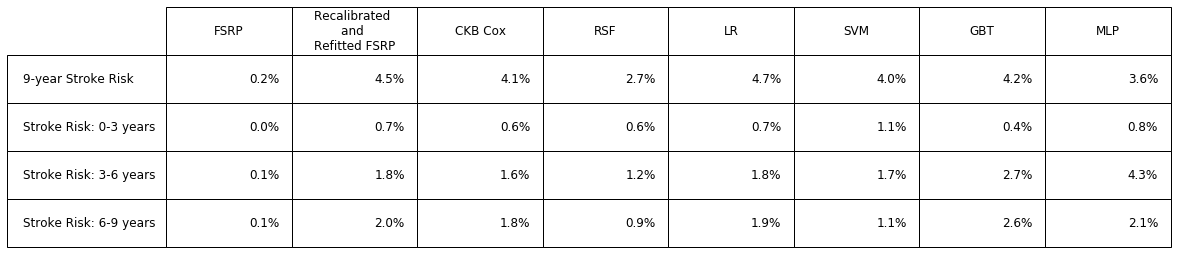

In [13]:
# Create table of risk estimates
fig, ax =plt.subplots(1,1)

col_labels = ['FSRP', 'Recalibrated \nand \nRefitted FSRP', 'CKB Cox', 'RSF', 'LR', 'SVM', 'GBT', 'MLP']
row_labels = ['9-year Stroke Risk', 'Stroke Risk: 0-3 years', 'Stroke Risk: 3-6 years','Stroke Risk: 6-9 years']
table_vals = (np.array([
              [FSRP_9yr_risk[0], Recalibrated_Refitted_FSRP_9yr_risk[0], Cox_9yr_risk[0], RSF_9yr_risk, LR_9yr_risk[0], SVM_9yr_risk[0], GBT_9yr_risk[0], MLP_9yr_risk[0]], 
              [FSRP_0_3yr_risk[0], Recalibrated_Refitted_FSRP_0_3yr_risk[0], Cox_0_3yr_risk[0], RSF_0_3yr_risk, LR_0_3yr_risk[0], SVM_0_3yr_risk[0], GBT_0_3yr_risk[0], MLP_0_3yr_risk[0]], 
              [FSRP_3_6yr_risk[0], Recalibrated_Refitted_FSRP_3_6yr_risk[0], Cox_3_6yr_risk[0], RSF_3_6yr_risk, LR_3_6yr_risk[0], SVM_3_6yr_risk[0], GBT_3_6yr_risk[0], MLP_3_6yr_risk[0]],
              [FSRP_6_9yr_risk[0], Recalibrated_Refitted_FSRP_6_9yr_risk[0], Cox_6_9yr_risk[0], RSF_6_9yr_risk, LR_6_9yr_risk[0], SVM_6_9yr_risk[0], GBT_6_9yr_risk[0], MLP_6_9yr_risk[0]]
             ]))

risk_estimate_df=pd.DataFrame(table_vals,columns=col_labels)
risk_estimate_df.update(risk_estimate_df.applymap('{:.1%}'.format))

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=risk_estimate_df.values,colLabels=risk_estimate_df.columns,rowLabels=row_labels,loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3,4)